
## 任意の値のインピュテーション

インピュテーションとは、欠落したデータを統計的な推定値で置き換えることです。どのようなインピュテーション技術も、機械学習モデルの学習に使用できる**完全なデータセット**を作成することを目的としています。

任意値インピュテーションは、変数内で発生したすべての欠損値（NA）を任意の値で置き換えることである。一般的には、0、999、-999（またはその他の9の組み合わせ）、-1（分布が正の場合）などの任意の値が使用されます。


### 任意の値でインピュートできる変数は？

カテゴリー変数、数値変数ともに、任意の値で入力することができます。

カテゴリー変数の場合、これはNAのすべてのインスタンスを追加のラベルで置き換えることに相当しますが、これは非常に一般的な方法なので、今後のノートで別途扱います。

### 前提条件

- データは無作為に欠損しない。

このような場合、欠損値を最も一般的な値である平均値や中央値に置き換えるのではなく、別の（任意の）値でフラグを立てます。


### メリット

- 実装が簡単
- 完全なデータセットを迅速に得ることができる
- 本番環境（モデル導入時）に統合可能
- 欠落」がある場合、その重要性を把握できる


### 制限事項

- 元の変数分布の歪曲
- 元の分散の歪み
- データセットの残りの変数との共分散の歪み
- 任意の値が分布の端にある場合、外れ値を隠したり、作ったりする可能性がある。
- 任意値が平均値や中央値（または変数分布の一般的な値）に似すぎていないか注意する必要があります。


### 任意値インピュテーションを使用する場合

NAを任意の値で置き換えるのは，NAが無作為に欠落していないと信じられる理由がある場合に使うべきである。このような状況では、中央値や平均値に置き換えて、NAが観測値の大部分のように見えるようにしたくありません。その代わりに、オブザベーションが欠落しているという事実を示したいのです。

このアプローチは、組織でもKaggleコンペティションでも広く使用されています。NAを任意の値で置き換えることで構成されています。あなたが作成した任意の値ですが、理想的には中央値/平均値/モードとは異なり、変数の正常値の範囲内ではありません。

問題は、どのような任意の値を選択するかということです。

### 最後の注意

変数が信用機関などの第三者に捕捉された場合、その観測値が欠損しているという事実を知らせるために、任意の数字を配置します。そのため、任意の値の帰属は、現実のデータ収集においても一般的に行われています。

## このデモでは

Ames House PriceとTitanicのデータセットに対して、pandasを使って任意の値の代入を行う方法を学習します。

- データセットをダウンロードするには、このコースの**セクション1**にある**データセット**の講義を参照してください。



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# データセットを分割する
from sklearn.model_selection import train_test_split

In [ ]:
# デモのためにいくつかの変数を使ってTitanicデータセットを読み込む

data = pd.read_csv('/content/drive/MyDrive/特徴量工学/Section-04-Missing-Data-Imputation/titanic.csv', usecols=['age', 'fare', 'survived'])
data.head()

,survived,age,fare
0,1,29,211.3375
1,1,0.9167,151.55
2,0,2,151.55
3,0,30,151.55
4,0,25,151.55


In [ ]:
# NAの割合を見てみよう

data.isnull().mean()

survived    0.0
age         0.0
fare        0.0
dtype: float64

In [ ]:

data

,survived,age,fare
0,1,29,211.3375
1,1,0.9167,151.55
2,0,2,151.55
3,0,30,151.55
4,0,25,151.55
...,...,...,...
1304,0,14.5,14.4542
1305,0,?,14.4542
1306,0,26.5,7.225
1307,0,27,7.225


欠損データのある変数はAgeのみで、欠損率は約20%です。

### インピュテーションの重要性

インピュテーションはトレーニングセットで行われ、テストセットに伝搬される必要があります。任意の値のインピュテーションでは、任意の値を選択しているので、それほど重要ではありませんが、この習慣を守り、訓練セットの変数の分布だけを見て任意の値を選択するのが良いでしょう。


In [ ]:
# トレーニングセットとテストセットに分けてみましょう

X_train, X_test, y_train, y_test = train_test_split(
    data[['age', 'fare']], # 予測変数
    data['survived'], #ターゲット
    test_size=0.3, # テストセットに含まれるオブの割合
    random_state=0) # 再現性を確保するためのシード

X_train.shape, X_test.shape


((916, 2), (393, 2))

In [ ]:

# 訓練セットの欠損データを調べてみましょう
# 割合は、データセット全体のものとかなり似ているはずです。
# データセット全体の
    
X_train.isnull().mean()    

age     0.0
fare    0.0
dtype: float64

In [ ]:
# 欠損値を任意の値で埋める関数を作ってみましょう。
# the variable は、データフレーム、変数、および na を置換する値を受け取ります。

# そして、埋められたnaを持つ変数を返す


def impute_na(df, variable, value):

    return df[variable].fillna(value)

In [ ]:
# # 変数の分布を調べてみよう
# # どの任意の値を使用するかを決めるために

# X_train.hist(bins=50)
# plt.show()

In [ ]:
X_train

,age,fare
501,13,19.5
588,4,23
402,30,13.8583
1193,?,7.725
686,22,7.725
...,...,...
763,0.1667,20.575
835,?,8.05
1216,?,7.7333
559,20,36.75


In [ ]:
# このデモではNAを2つの異なる任意の値で置き換えます
# 1つは分布の右端にあるもの ==> 99
# Ageが正の値しか取らないことを利用して # 替わりに-1で置き換える

# 最初に99に置き換える
X_train['Age_99'] = impute_na(X_train, 'age', 99)

# 今度は-1に置き換える
X_train['Age_minus1'] = impute_na(X_train, 'age', -1)

X_train.head(15)


,age,fare,Age_99,Age_minus1
501,13,19.5,13,13
588,4,23,4,4
402,30,13.8583,30,30
1193,?,7.725,?,?
686,22,7.725,22,22
971,?,7.8792,?,?
117,30,56.9292,30,30
540,2,26,2,2
294,49,110.8833,49,49
261,35,26.2875,35,35


Ageに欠損データ（NaN）がある行を見て、新しい変数ではそれらが99または-1に置き換えられていることを確認してください。


In [ ]:

X_train=X_train[(~X_train['age'].str.contains('?', regex=False))&(
~X_train['fare'].str.contains('?', regex=False).sum())]

In [ ]:
# 任意値インピュテーション後の分散の変化を見ることができます。
# これは，欠損データの割合が非常に高いことから予想されます。
# Ageでは高い ~20%
X_train['age'] = X_train['age'].astype(np.float64)
print('Original variable variance: ', X_train['age'].var())
X_train['Age_99'] = X_train['Age_99'].astype(np.float64)

print('Variance after 99 imputation: ', X_train['Age_99'].var())
X_train['Age_minus1'] = X_train['Age_minus1'].astype(np.float64)

print('Variance after -1 imputation: ', X_train['Age_minus1'].var())

Original variable variance:  194.16304666581854
Variance after 99 imputation:  194.16304666581854
Variance after -1 imputation:  194.16304666581854


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

実際，分散への影響は，インピュテーションのために選択された任意の値の大きさによっても左右されます（99と-1を比較してください）．


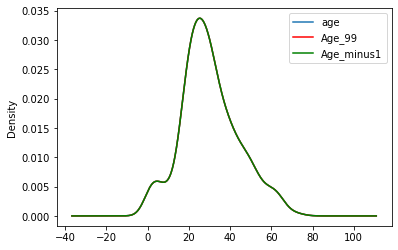

In [ ]:
# 分布が変化したことがわかります 
# より多くの値が任意の値に向かって蓄積されていることがわかる

fig = plt.figure()
ax = fig.add_subplot(111)

# 元の変数の分布
X_train['age'].plot(kind='kde', ax=ax)

# 99でインピュートされた変数
X_train['Age_99'].plot(kind='kde', ax=ax, color='red')

# 1でインピュートされた変数
X_train['Age_minus1'].plot(kind='kde', ax=ax, color='green')

# 凡例の追加
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')


前述のように，任意の値のインピュテーションは，変数 Age の元の分布を歪めます．変換された変数は、任意の値の周辺に多くの値を示しています。

**これは重要なことでしょうか？

それは、構築したい機械学習モデルによります。線形モデルは、変数が正規分布していることを前提としています。欠損データの割合が高い場合、任意の値のインピュテーションは元の正規分布を歪める可能性があります。そのため、最終的に入力された変数は正規分布ではなくなり、線形モデルのパフォーマンスに影響を与える可能性があります。

一方で，この手法は木構造のアルゴリズムとの相性が非常に良い．


In [ ]:
# 任意の値のインピュテーションがデータの他の変数との関係に # 影響を与える可能性があることも述べました 
# データセットの他の変数との関係に影響を与えるかもしれないと言いましたが、それを見てみましょう

X_train[['fare', 'age', 'Age_99', 'Age_minus1']].cov()

,age,Age_99,Age_minus1
age,194.163047,194.163047,194.163047
Age_99,194.163047,194.163047,194.163047
Age_minus1,194.163047,194.163047,194.163047


確かに、任意の値のインピュテーションを行った後は、AgeとFareの共分散が変化していることがわかります。

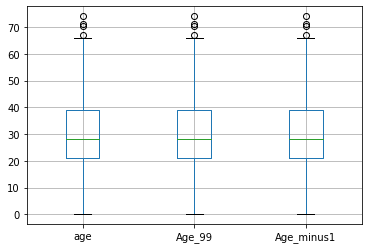

In [ ]:
# 最後に，任意の値の代入が外れ値の認識に # 影響を与える可能性があることを述べた．
# 外れ値の認識に影響すると述べました

# 箱ひげ図を使って調べてみましょう

X_train[['age', 'Age_99', 'Age_minus1']].boxplot()

分布の最後に値を追加すると、元の分布では外れ値だった値が完全にマスクされることがわかります。

## House Prices Dataset

家屋価格のデータセットで練習を繰り返してみましょう。このデータセットでは、欠損データが多いか少ないかの変数があります。したがって，両方のシナリオで，任意の値のインピュテーションの効果を比較することができます．



In [ ]:

# 我々は以下の変数のみを使用します。
# そのうち3つはNAを含みます

cols_to_use = [
    'OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'WoodDeckSF',
    'BsmtUnfSF', 'LotFrontage', 'MasVnrArea', 'GarageYrBlt', 'SalePrice'
]

In [ ]:
# House Prices データセットをロードします。

data = pd.read_csv('/content/drive/MyDrive/特徴量工学/Section-04-Missing-Data-Imputation/HousePrice.csv', usecols=cols_to_use)
print(data.shape)
data.head()

(1460, 10)


,LotFrontage,OverallQual,MasVnrArea,BsmtUnfSF,TotalBsmtSF,1stFlrSF,GrLivArea,GarageYrBlt,WoodDeckSF,SalePrice
0,65.0,7,196.0,150,856,856,1710,2003.0,0,208500
1,80.0,6,0.0,284,1262,1262,1262,1976.0,298,181500
2,68.0,7,162.0,434,920,920,1786,2001.0,0,223500
3,60.0,7,0.0,540,756,961,1717,1998.0,0,140000
4,84.0,8,350.0,490,1145,1145,2198,2000.0,192,250000


In [ ]:

# 欠損データを含む変数を表示する

# 次のリスト comprehensionでは，データセットのすべての列をループして 
# データセットのすべての列をループして、データが欠落しているものを選択します。

[var for var in data.columns if data[var].isnull().sum()>0]

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [ ]:
# それらの変数の欠損率を求める
# セクション3の変数の特徴で学んだのと同じコードです。

data[['LotFrontage', 'MasVnrArea', 'GarageYrBlt']].isnull().mean()

LotFrontage    0.177397
MasVnrArea     0.005479
GarageYrBlt    0.055479
dtype: float64

まず、トレーニングとテストに分けます。

In [ ]:
# トレーニングセットとテストセットに分けてみましょう
X_train, X_test, y_train, y_test = train_test_split(data,
                                                    data['SalePrice'],
                                                    test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((1022, 10), (438, 10))

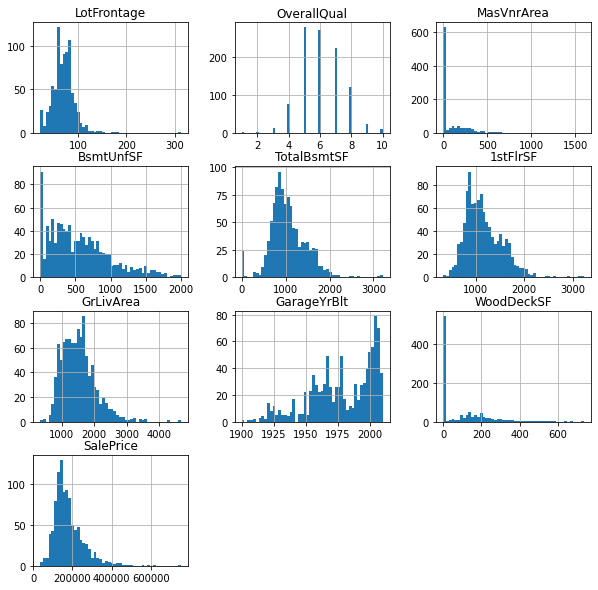

In [ ]:
# 変数の分布をプロットしよう
# このコードはセクション3の変数の特徴で学びました

X_train.hist(bins=50, figsize=(10,10))
plt.show()

In [48]:
X_train

,LotFrontage,OverallQual,MasVnrArea,BsmtUnfSF,TotalBsmtSF,1stFlrSF,GrLivArea,GarageYrBlt,WoodDeckSF,SalePrice,LotFrontage_imputed,MasVnrArea_imputed
64,NaN,7,573.0,318,1057,1057,2034,1998.0,576,219500,999.0,573.0
682,NaN,6,0.0,288,1291,1291,1291,1996.0,307,173000,999.0,0.0
960,50.0,5,0.0,162,858,858,858,NaN,117,116500,50.0,0.0
1384,60.0,6,0.0,356,560,698,1258,1939.0,0,105000,60.0,0.0
1100,60.0,2,0.0,0,290,438,438,1930.0,0,60000,60.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
763,82.0,8,673.0,89,1252,1268,2365,1999.0,0,337000,82.0,673.0
835,60.0,4,0.0,625,1067,1067,1067,1996.0,290,128000,60.0,0.0
1216,68.0,6,0.0,0,0,1318,1902,1978.0,0,112000,68.0,0.0
559,NaN,7,18.0,1374,1374,1557,1557,2003.0,143,234000,999.0,18.0


In [ ]:
# まずLotFrontageという変数を使ってみましょう

# 欠損値を置き換えた新しい変数を作ります
# 上で作成した関数を使って999で置き換えた新しい変数を作成します

# ここでは、分布の右端に値を置くために999を選びました。
# 分布の右端に値を置くために999を選びました。上の履歴からわかるように、LotFrontAgeは300までの値を取ります。
# 最大で300

X_train.loc[:,'LotFrontage_imputed'] = impute_na(X_train, 'LotFrontage', 999)
X_test.loc[:,'LotFrontage_imputed'] = impute_na(X_test, 'LotFrontage', 999)

In [ ]:

# MasVnrAreaは1500までの値を取るので、999はこの変数には使えません。
# この変数は通常の値なので、より大きな値を選択する必要があります。
# より大きな値を選ぶ必要がある: 2999

X_train.loc[:,'MasVnrArea_imputed'] = impute_na(X_train, 'MasVnrArea', 2999)
X_test.loc[:,'MasVnrArea_imputed'] = impute_na(X_test, 'MasVnrArea', 2999)

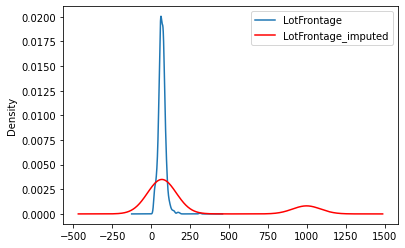

In [ ]:

# 任意のインピュテーションの分布への影響を評価してみましょう

# LotFrontAgeの分布が変化したことがわかります。
# より多くの値が999に向かって累積していることがわかります

fig = plt.figure()
ax = fig.add_subplot(111)

# 元の変数の分布
X_train['LotFrontage'].plot(kind='kde', ax=ax)

# 999でインピュートされた変数
X_train['LotFrontage_imputed'].plot(kind='kde', ax=ax, color='red')

# 凡例の追加
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')


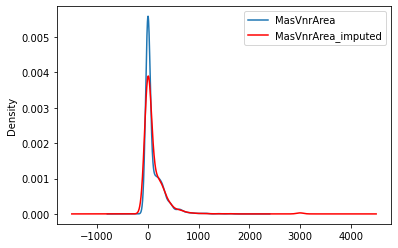

In [ ]:
# MasVnrAreaについては，欠損データの割合が少なかったので
# 欠損率が低かったので、分布の変化は小さい

fig = plt.figure()
ax = fig.add_subplot(111)

# 元の変数の分布
X_train['MasVnrArea'].plot(kind='kde', ax=ax)

# 2999でインピュートされた変数
X_train['MasVnrArea_imputed'].plot(kind='kde', ax=ax, color='red')

# 凡例の追加
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')



上のプロットから，LotFrontAgeの分布はかなり劇的に変化していることがわかりますが，MasVnrAreaの分布はそれほど変化していません。これは、2つ目の変数の欠損値の割合が非常に小さいからです。しかし、NAを置き換えるために選択した任意の値に応じて、分布は多かれ少なかれ影響を受けます。

いろいろな数値を試してみて、分布を比較してみてはいかがでしょうか。

最後に、デモを見ると、任意の値を選ぶ作業がかなりマニュアル化されていることがわかります。変数ごとに、分布や最小値・最大値を観察して、任意の値を選択する必要があります。少数の変数であれば問題ありませんが、何百、何千もの変数を含むデータセットの場合は、少々不便です。自動化のための代替手段として、次のノートブックで見るように、分布の最後に値を配置することができます。


In [ ]:

# 同様に，インピュテーション技術の効果を調べることができます．
# The variance

# LotFrontAgeでは，帰納法による分散の変化が見られます．
# 欠損データの割合が非常に高いため，これは予想される．
# 高い #20%

# 実際には，その効果は非常に劇的です

print('Original Variance: ', X_train['LotFrontage'].var())
print('インピュテーション後の分散: ', X_train['LotFrontage_imputed'].var())


Original Variance:  532.5872021885676
インピュテーション後の分散:  130742.07296576179


In [ ]:
# MasnVnrAreaについても同様で，NAの割合は小さくても，任意の値はずっと大きいです．
# 任意の値の方がはるかに大きく，それが分散に影響を与えている
# かなりの確率で


print('Original Variance: ', X_train['MasVnrArea'].var())
print('Variance after imputation: ', X_train['MasVnrArea_imputed'].var())

Original Variance:  32983.538710039466
Variance after imputation:  73677.02879932376


In [ ]:
# 最後に、共分散を調べてみましょう。
# 下の表の値をじっくりと比較してみてください。


X_train.cov()

,LotFrontage,OverallQual,MasVnrArea,BsmtUnfSF,TotalBsmtSF,1stFlrSF,GrLivArea,GarageYrBlt,WoodDeckSF,SalePrice,LotFrontage_imputed,MasVnrArea_imputed
LotFrontage,532.587202,6.587119,6.805603e+02,9.496573e+02,2.908856e+03,3.379794e+03,3.919952e+03,30.611717,1.347414e+02,6.689645e+05,532.587202,7.585010e+02
OverallQual,6.587119,1.843859,1.014970e+02,1.746147e+02,2.886241e+02,2.242973e+02,4.091242e+02,17.902809,3.168557e+01,8.320132e+04,-18.279174,1.140556e+02
MasVnrArea,680.560330,101.496976,3.298354e+04,7.540788e+03,2.478877e+04,2.086595e+04,3.520785e+04,1203.583792,3.208924e+03,6.836439e+06,1582.711167,3.298354e+04
BsmtUnfSF,949.657293,174.614725,7.540788e+03,1.875241e+05,7.513307e+04,4.987449e+04,5.203392e+04,1823.065167,-1.833201e+03,6.833028e+06,-19005.620715,8.391605e+03
TotalBsmtSF,2908.855504,288.624075,2.478877e+04,7.513307e+04,1.682931e+05,1.212079e+05,8.615192e+04,3173.042442,1.227966e+04,2.003928e+07,1620.452017,2.503117e+04
1stFlrSF,3379.793504,224.297266,2.086595e+04,4.987449e+04,1.212079e+05,1.398656e+05,1.044401e+05,2009.195552,1.109406e+04,1.783631e+07,7485.021442,1.971276e+04
GrLivArea,3919.951834,409.124216,3.520785e+04,5.203392e+04,8.615192e+04,1.044401e+05,2.681277e+05,2738.982988,1.558395e+04,2.934477e+07,9634.034363,3.694487e+04
GarageYrBlt,30.611717,17.902809,1.203584e+03,1.823065e+03,3.173042e+03,2.009196e+03,2.738983e+03,624.305948,6.658911e+02,9.309355e+05,45.643154,1.588757e+03
WoodDeckSF,134.741376,31.685571,3.208924e+03,-1.833201e+03,1.227966e+04,1.109406e+04,1.558395e+04,665.891118,1.648582e+04,3.029981e+06,5377.154974,2.664993e+03
SalePrice,668964.454191,83201.317781,6.836439e+06,6.833028e+06,2.003928e+07,1.783631e+07,2.934477e+07,930935.489321,3.029981e+06,6.105731e+09,950743.964420,7.152962e+06


**今回のデモはここまでです。後のセクションでは、scikit-learnとfeature engineを使って任意の値のインピュテーションを行う方法を紹介します**。
